In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
data = pd.read_csv('NN_data/train.csv')
print(data.head())

In [ ]:
data = np.array(data)
print(data)

In [ ]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [ ]:
Y_train

In [ ]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [ ]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 5000)

In [46]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [3]
Label:  3


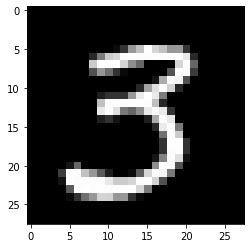

In [47]:
test_prediction(275, W1, b1, W2, b2)

In [48]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[2 8 6 7 6 1 2 3 0 1 2 3 2 2 6 2 5 9 6 7 9 4 9 4 6 8 7 2 0 7 9 7 8 9 3 2 5
 4 0 1 9 1 6 8 4 1 0 2 1 6 3 1 4 4 4 4 9 1 8 7 7 5 8 1 3 0 7 5 4 2 9 6 9 7
 7 4 3 4 5 6 4 2 7 0 8 4 3 9 0 4 2 0 3 3 3 6 0 6 1 0 7 9 7 7 6 3 9 0 3 3 9
 8 4 0 2 9 4 1 5 1 7 3 2 9 3 4 9 4 8 4 9 7 8 0 6 3 6 1 8 5 9 7 6 6 1 1 8 1
 6 7 2 6 1 9 2 6 3 6 4 4 8 9 6 1 2 1 0 5 5 7 3 3 1 1 5 8 6 7 7 0 9 0 4 4 2
 4 1 9 6 0 9 1 0 3 3 2 0 9 2 3 1 0 3 0 7 1 0 8 2 0 0 8 5 5 7 3 9 5 4 8 4 7
 2 7 0 3 1 6 3 6 1 7 8 4 0 0 8 0 5 6 8 5 9 9 9 7 8 0 4 5 9 0 2 7 7 9 2 7 9
 7 0 0 0 4 4 3 0 1 1 2 7 2 8 9 3 0 1 6 5 2 7 4 6 9 5 4 3 0 2 8 2 2 1 7 0 7
 0 3 3 1 4 6 3 4 0 9 8 1 4 3 4 1 3 3 0 0 3 1 2 2 3 3 1 1 4 3 4 4 7 6 2 5 9
 6 5 9 6 5 6 3 4 0 9 3 4 9 6 3 0 8 6 1 4 2 3 0 1 6 4 1 1 6 0 1 4 0 4 4 1 3
 6 7 1 7 8 1 3 0 3 3 2 9 6 0 9 9 9 1 4 5 2 6 3 6 6 6 9 5 3 2 9 4 7 5 5 7 9
 9 2 9 8 1 7 8 7 9 7 0 0 9 8 3 9 0 7 2 7 2 6 4 8 4 2 8 5 9 4 6 2 2 5 3 2 5
 2 3 4 7 3 9 0 8 1 9 7 3 6 0 1 1 1 4 3 0 7 7 1 6 7 8 8 6 4 6 0 1 4 8 0 9 8
 2 3 3 7 6 9 1 0 8 0 6 6 

0.918

In [49]:
missmatches = []
for i in range(0,len(dev_predictions)):
    if dev_predictions[i] != Y_dev[i]:
        missmatches.append(i+1)
print(missmatches)

[2, 15, 21, 27, 29, 35, 48, 72, 78, 101, 115, 131, 140, 157, 160, 168, 203, 237, 243, 247, 249, 259, 274, 275, 282, 299, 306, 307, 309, 359, 389, 399, 401, 403, 421, 427, 444, 479, 515, 547, 553, 565, 581, 611, 627, 632, 648, 672, 695, 697, 701, 703, 704, 715, 724, 726, 743, 746, 750, 751, 756, 764, 785, 801, 809, 823, 833, 840, 845, 846, 860, 869, 874, 887, 897, 909, 923, 931, 949, 976, 982, 995]


Prediction:  [3]
Label:  3


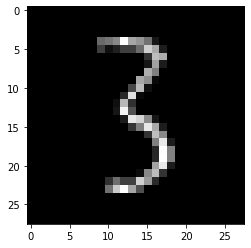

In [63]:
test_prediction(553, W1, b1, W2, b2)